### Options Pricing Using Monte Carlo Simulation

In [33]:
import numpy as np
import pandas as pd
from numpy.random import normal
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Stock prices follow the stochastic equation of geometric brownian motion:
   **dS(t) = mu * S(t) * dt + sigma * S(t) * dW(t)**

In [34]:
def geometric_brownian_motion(S0, mu, sigma, T, N):
    dt = T / N
    S_t = [S0]
    
    for i in range(1, N+1):
        dS_t = mu * S_t[-1] * dt + sigma * S_t[-1] * np.sqrt(dt) * normal(0, 1)
        S_t.append(S_t[-1] + dS_t)
        
    return pd.Series(S_t)

#### Method for pricing options:
 1) Create simulations of the stock price movement <br>
 2) Calculate the option payoff for each path <br>
 3) Average the payoffs for all paths and discount it back to the starting time point

### Calculating option price for NIFTY 50

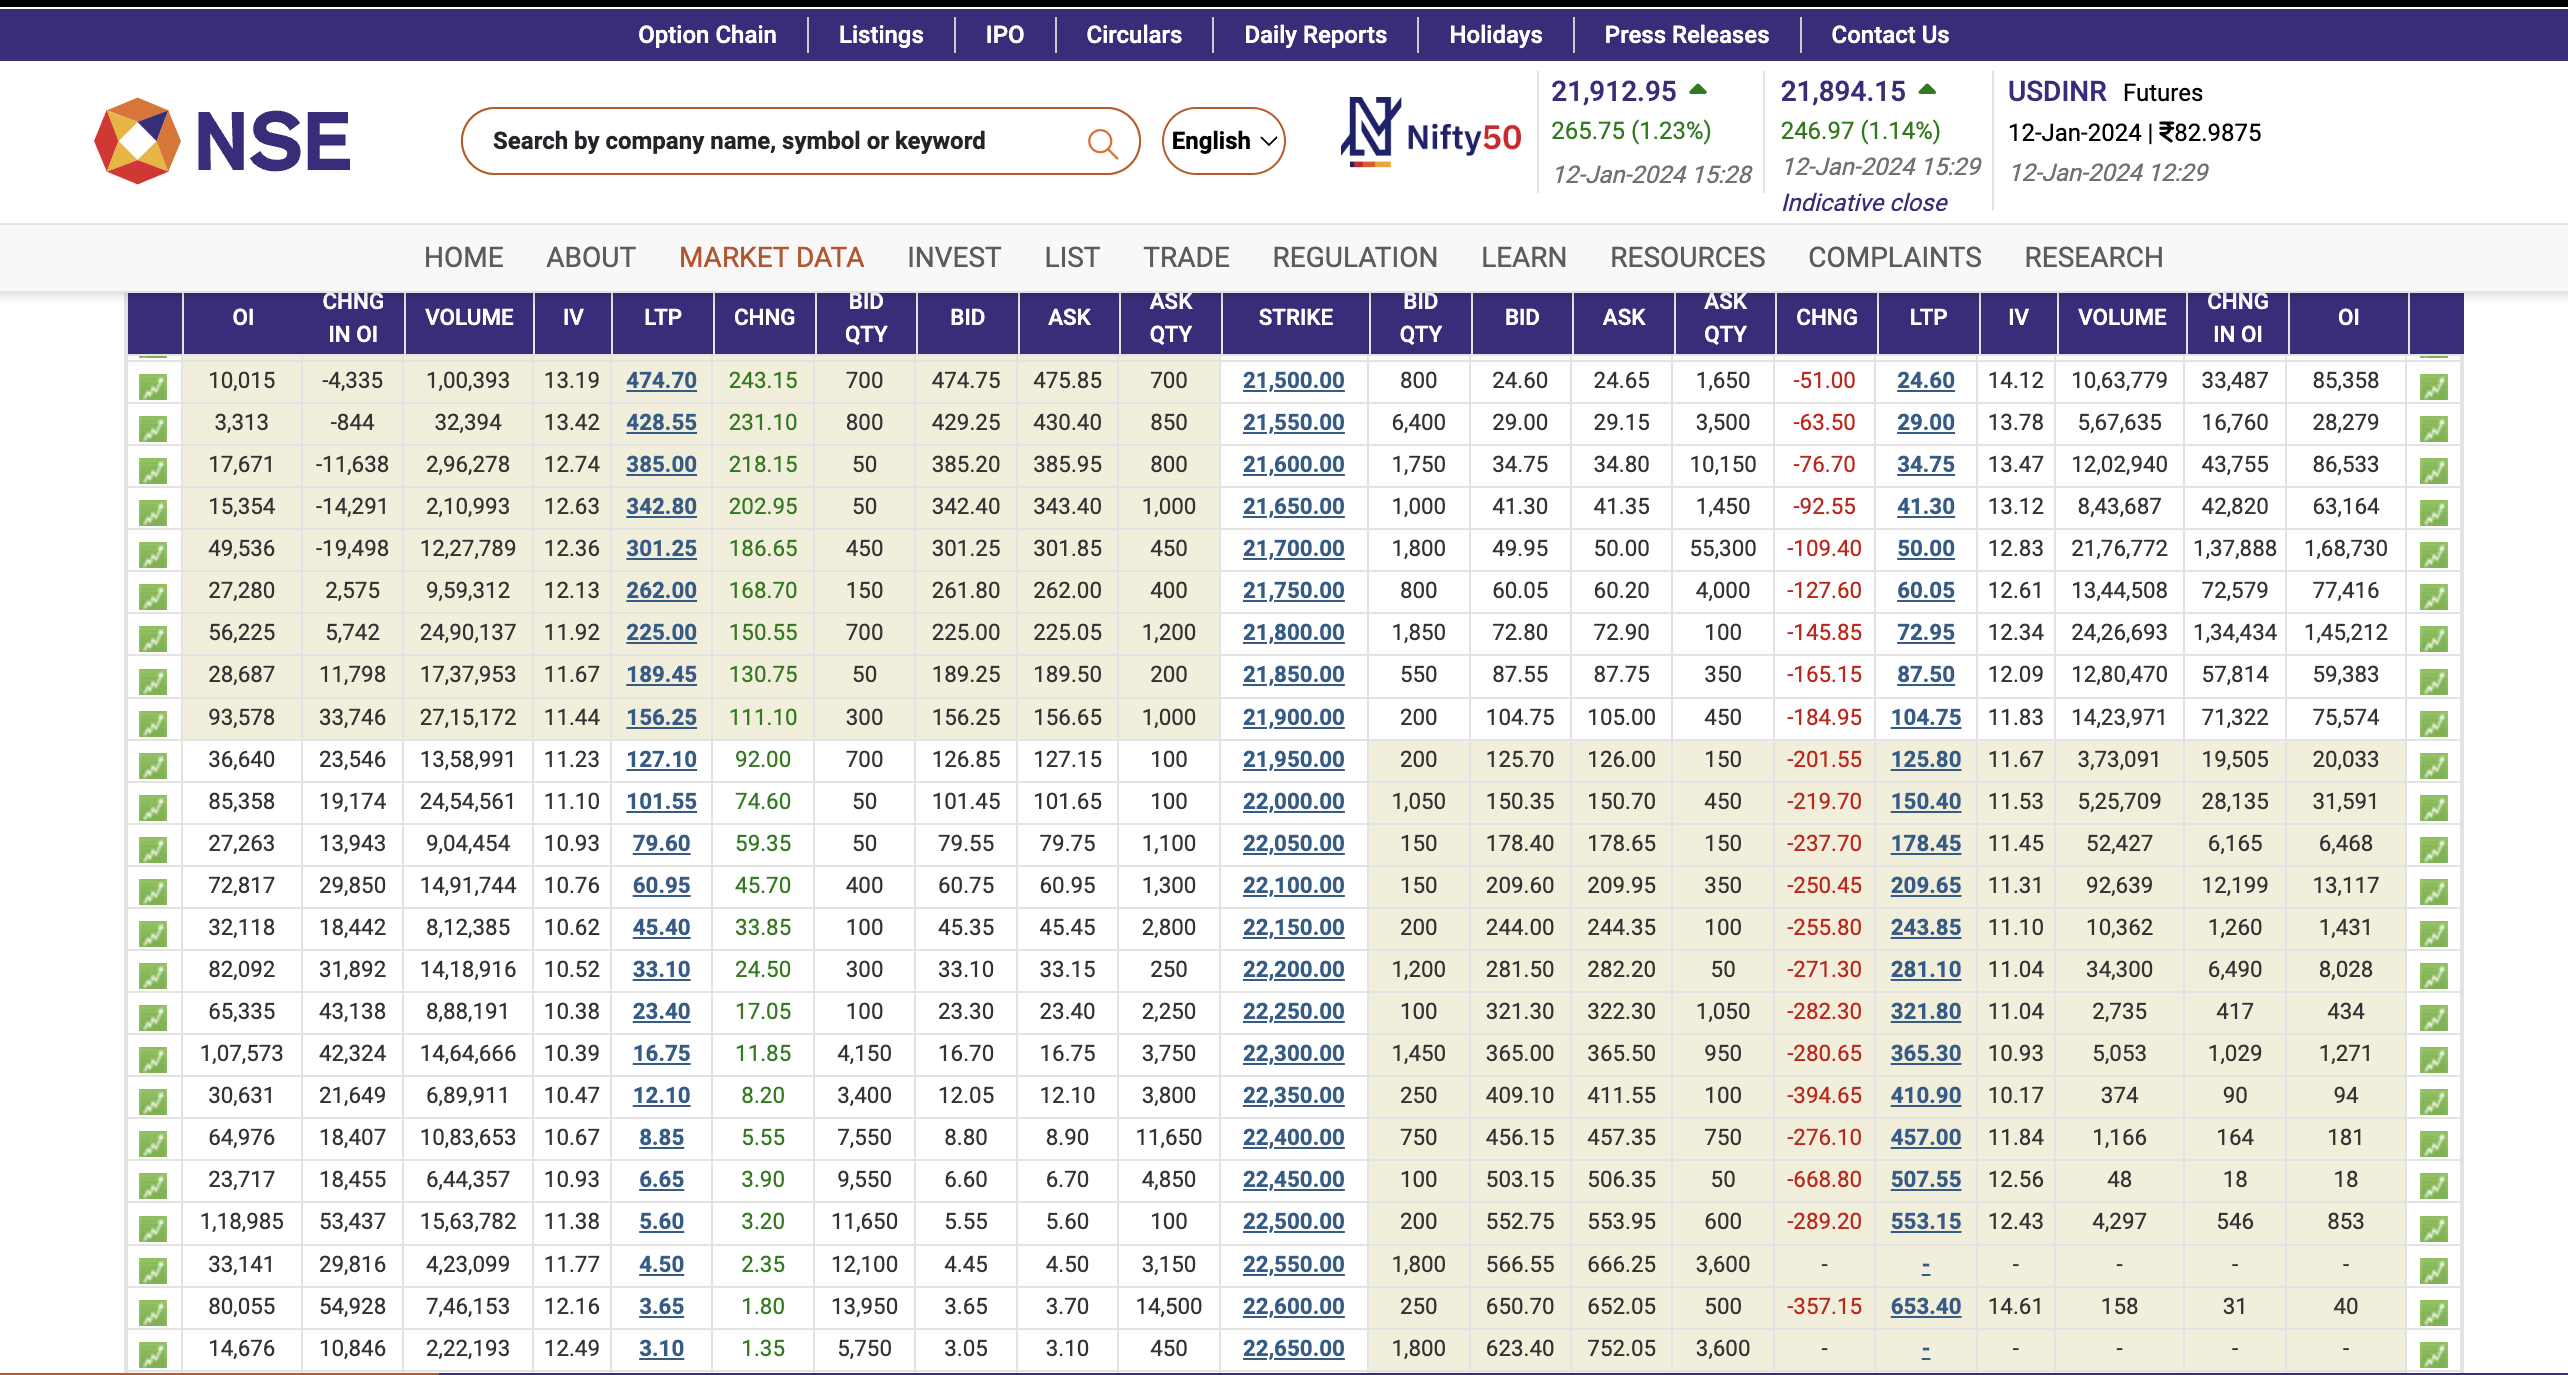

**Call Option with the following parameters:** <br>
S0 = 21912.95 <br>
K = 21900 <br>
sigma = 0.1144 <br>
T = 6 / 252 (6 days) <br>

We can use the historical data of the index to calculate mu

In [35]:
import yfinance as yf

start_date = "2023-01-12"
end_date = "2024-01-12"

ticker = yf.Ticker("^NSEI")
index = ticker.history(start = start_date, end = end_date)["Close"]

c:\Users\sites\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [36]:
daily_returns = index.pct_change()[1:]
mu = np.mean(daily_returns)
mu

0.0008040832984051189

In [37]:
S0 = 21912.95
K = 21900
sigma = 0.1144
T = 6 / 252
r = 0.07       # risk-free rate

In [38]:
NUM_SIMULATIONS = 10000
NUM_STEPS = 252

In [39]:
price_simulations = []

for i in range(NUM_SIMULATIONS):
    price_simulations.append(geometric_brownian_motion(S0, mu, sigma, T, NUM_STEPS))
    
price_simulations = pd.DataFrame(price_simulations).T

In [40]:
price_simulations

,0,1,2,3,4,5,6,7,8,9,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999
0,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000,...,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000,21912.950000
1,21931.244076,21892.796081,21915.391754,21921.877990,21953.615711,21907.922578,21905.725248,21925.655109,21882.754903,21906.108580,...,21938.977462,21850.693143,21919.967431,21872.615698,21897.091386,21889.188522,21889.362014,21904.302067,21896.369628,21918.812188
2,21959.129268,21850.482692,21964.793137,21930.154373,21991.412604,21888.391385,21888.632642,21869.463373,21852.246589,21894.534697,...,21930.568922,21876.571823,21910.034061,21830.255772,21935.215290,21849.545773,21894.036836,21947.986551,21877.255032,21887.446435
3,21954.924776,21835.266593,21990.371398,21926.116026,21976.338254,21892.841677,21920.284057,21863.623258,21860.040352,21890.139727,...,21958.391415,21863.900691,21873.742266,21832.518260,21954.846556,21869.001936,21919.533188,21994.346503,21912.456304,21869.016887
4,21969.255170,21837.706694,22006.512754,21966.490263,21995.100721,21882.654786,21932.570424,21893.022433,21869.838635,21902.110504,...,21934.841050,21906.283561,21883.920787,21874.145241,21968.241183,21859.744462,21921.491062,21994.206047,21890.362040,21866.963106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,21736.710572,21733.817023,21364.587929,21945.605886,21721.893255,21838.111218,21987.728900,22165.514618,21859.261435,21899.100624,...,22506.613225,21634.095487,21186.009305,22548.723132,22157.114059,22331.156153,21723.748239,20882.545323,22009.375442,22126.197258
249,21740.979322,21741.962335,21338.963713,21909.785637,21691.746570,21811.068156,21997.532521,22141.427269,21865.210965,21878.432778,...,22482.559604,21628.527072,21173.510721,22548.120597,22192.575583,22315.515037,21805.831651,20857.940860,21992.773383,22128.839861
250,21754.536586,21756.953914,21325.473131,21868.873056,21665.628709,21767.806334,21995.851230,22173.097470,21897.260472,21901.100515,...,22500.816711,21641.272609,21211.788203,22530.415344,22210.563168,22330.313089,21807.454717,20881.725236,22038.604612,22119.221155
251,21762.184025,21733.081168,21315.530390,21889.787895,21639.711079,21803.339896,22006.996379,22156.624767,21882.872376,21895.509284,...,22493.930858,21659.560461,21208.034300,22540.939277,22195.944387,22304.160121,21751.643624,20894.976255,22072.960732,22118.342715


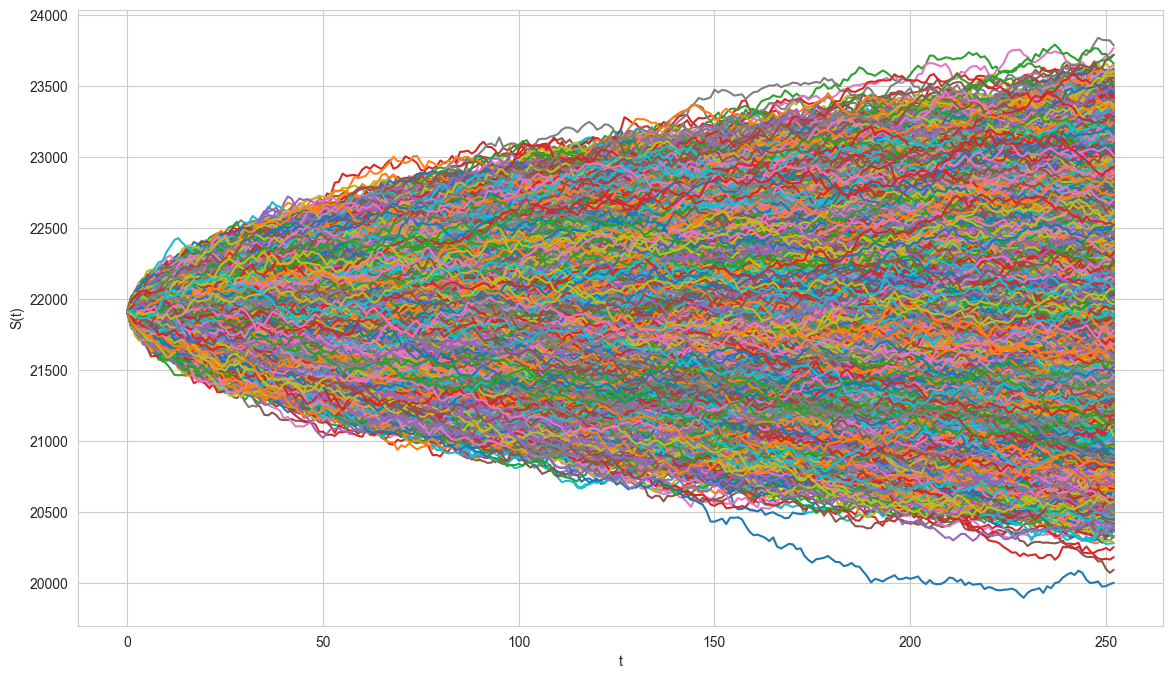

In [41]:
plt.figure(figsize = (14, 8))
plt.plot(price_simulations)
plt.xlabel("t")
plt.ylabel("S(t)")
plt.show()

In [42]:
terminal_prices = price_simulations.iloc[-1]
payoffs = []

for price in terminal_prices:
    payoffs.append(max(price - K, 0))

avg_payoff = np.mean(payoffs)
discount_factor = np.exp(-r * T)
call_price = avg_payoff * discount_factor

In [43]:
call_price

161.2433730944918

### Black-Scholes Pricing

In [44]:
from scipy.stats import norm

In [45]:
d1 = (np.log(S0/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
bs_call = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
bs_call

180.10935430808422

### Implied Volatility Smile

In [46]:
df = pd.read_csv("option-chain-ED-NIFTY-18-Jan-2024 - option-chain-ED-NIFTY-18-Jan-2024.csv")

In [47]:
df

,OI,CHNG IN OI,VOLUME,IV,LTP,CHNG,BID QTY,BID,ASK,ASK QTY,STRIKE
0,98,20,36,30.27,"1,253.40",296.60,"3,200","1,244.70","1,258.75",50,"20,700.00"
1,27,14,803,29.38,"1,203.85",293.45,100,"1,196.90","1,216.25",150,"20,750.00"
2,466,3,93,23.86,"1,139.80",285.20,200,"1,150.40","1,163.95","1,000","20,800.00"
3,58,56,797,27.19,"1,103.25",358.45,250,"1,098.00","1,116.85",500,"20,850.00"
4,707,11,172,27.75,"1,059.80",306.55,100,"1,054.25","1,059.40",100,"20,900.00"
5,51,-,6,24.35,"1,000.15",299.45,200,965.35,"1,052.65","4,400","20,950.00"
6,"6,620",223,"4,400",25.29,958.25,293.35,50,958,959.95,100,"21,000.00"
7,40,3,51,23.50,905,294.05,200,872.05,911,200,"21,050.00"
8,"1,210",-16,355,22.75,856.3,286.75,50,859,862.4,400,"21,100.00"
9,244,34,134,18.97,794.95,272.35,50,768.4,815.05,100,"21,150.00"


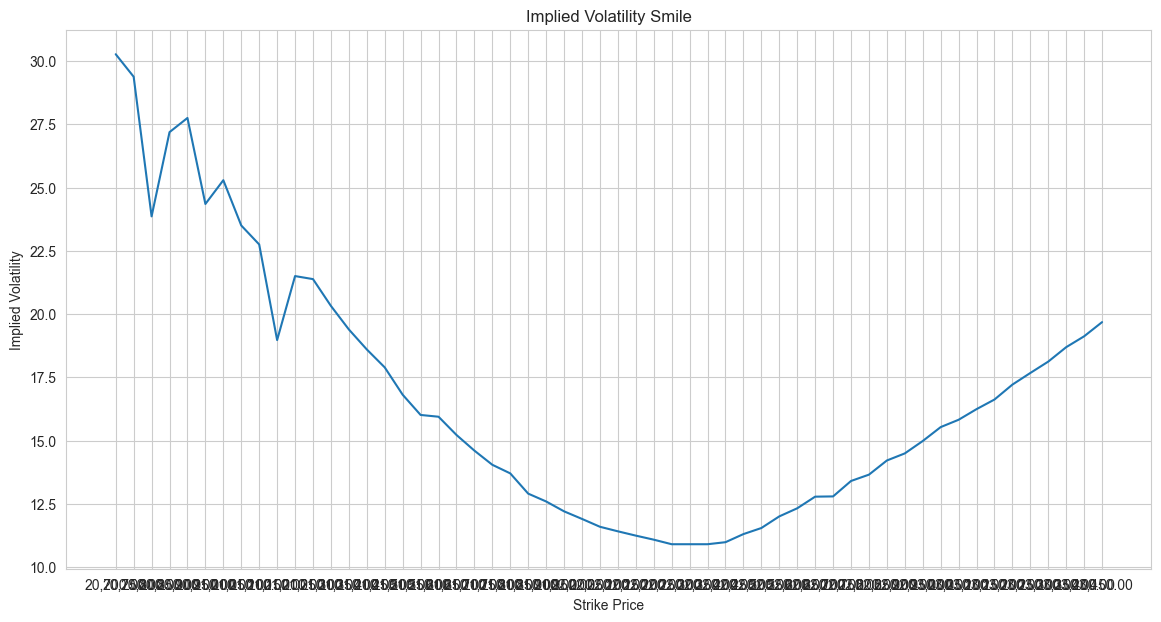

In [48]:
plt.figure(figsize = (14, 7))
plt.plot(df['STRIKE'], df['IV'])
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.title("Implied Volatility Smile")
plt.show()